<font color = green>

# Linear Regression one variable (manual implementation)

</font>

<font color = red>

## WARNING: In case of The Boston housing prices dataset has an ethical problem and it was removed in sklearn version >= 1.2,
## I will use the fetch_california_housing, which has the same idea, and similar to Boston data. Column RM(Boston) is equal to AveRooms(California_housing)
</font>

<font color = green >

### Import necessary packages
</font>

In [289]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

<font color = green >

### Set interactive backend 
</font>

In [290]:
%matplotlib inline

<font color = green >

### Load data set 
</font>

In [291]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


<font color = green >

### Select one feature
</font>

In [292]:
df = df[['AveRooms']] # Note: returns df comparing to  df['RM']
df['target'] = y

<font color = green >

### Review the data 
</font>

In [293]:
print (df.head(10))
df.describe ()

   AveRooms  target
0  6.984127   4.526
1  6.238137   3.585
2  8.288136   3.521
3  5.817352   3.413
4  6.281853   3.422
5  4.761658   2.697
6  4.931907   2.992
7  4.797527   2.414
8  4.294118   2.267
9  4.970588   2.611


,AveRooms,target
count,20640.000000,20640.000000
mean,5.429000,2.068558
std,2.474173,1.153956
min,0.846154,0.149990
25%,4.440716,1.196000
50%,5.229129,1.797000
75%,6.052381,2.647250
max,141.909091,5.000010


<Axes: xlabel='AveRooms', ylabel='target'>

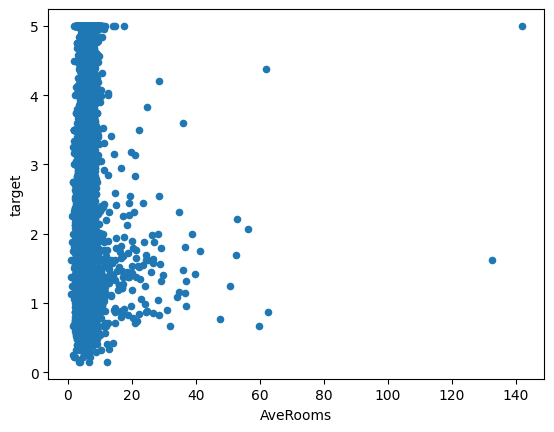

In [294]:
df.plot.scatter('AveRooms', 'target')

<font color = green >

## Custom Linear Regression Classifier
</font>

<font color = green >

### Load all data 
</font>

In [295]:
X, y = fetch_california_housing(return_X_y=True)

# YOUR_CODE. select the values of feature 2 only (corresponding to 'AveRooms') and assign to X 
# START_CODE 
X= X[:,2]
# END_CODE 

X= X.reshape(-1,1) # make it 2d as for case of mutivariable

# YOUR_CODE. Apply train_test_split to X and Y to get X_train, X_test, y_train, y_test
# START_CODE 
X_train, X_test, y_train, y_test=  train_test_split(X, y)
# END_CODE 


<font color = blue >

### Check loaded data

</font>

In [296]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:10]

X_train.shape=  (15480, 1)
y_train.shape=  (15480,)


array([[5.50763359],
       [4.15044248],
       [5.83475298],
       [5.        ],
       [4.55139186],
       [5.12313433],
       [3.98773006],
       [4.37631027],
       [6.8106576 ],
       [5.76434426]])

<font color = blue>
Expected output:
</font>

<br>`X_train.shape=  (15480, 1)`
<br>`y_train.shape=  (15480,)`

<font color = green >

### Develop expresion of h (h is a hypothesis)

</font>

In [297]:
class Linear_Regression_1():
    def __init__(self):
        pass
            
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Assign expression for h to h_res 
        # START_CODE 
        # it is not neccessary to transpose w, because it is a single value
        h_res= w * X + b
        # END_CODE 
        
        return h_res

<font color = blue >

### Check h

</font>

In [298]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2018)
b_check= np.random.randn()
w_check= np.random.randn(1,1)
X_check= np.random.randn(10,1)
print('b= {}, \nw= {}, \nX= \n{}'.format(b_check, w_check, X_check))
lin_reg_1 = Linear_Regression_1()
lin_reg_1.h(b_check, w_check, X_check)

b= -0.276767596147759, 
w= [[0.581851]], 
X= 
[[ 2.14839926]
 [-1.279487  ]
 [ 0.50227689]
 [ 0.8560293 ]
 [-0.14279008]
 [ 0.11007867]
 [-0.68806479]
 [ 0.43356408]
 [ 0.510221  ]
 [-0.16513097]]


array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       [ 0.22131391],
       [-0.35985014],
       [-0.21271821],
       [-0.67711878],
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])

<font color = blue>
Expected output:
</font>


``` 
([[ 0.97328067],
[-1.02123839],
[ 0.01548272],
[ 0.22131391],
[-0.35985014],
[-0.21271821],
[-0.67711878],
[-0.0244979 ],
[ 0.02010501],
[-0.37284922]])


<font color = green >

### Develop expresion of Cost Function

</font>

In [299]:
class Linear_Regression_2():
    '''linear regression using gradient descent
    '''
    def __init__(self):
        pass


    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')    
   
        # YOUR_CODE. Assign expression for J to J_res 
        # START_CODE 
        m = h.shape[0]
        J_res = 1/(2*m) * np.sum((h - y)**2)
        # END_CODE         
        return J_res           
 

<font color = blue >

### Check J

</font>

In [300]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2019)
m = 10 
y_check= np.random.randn(m,1)
h_check= np.random.randn(m,1)
print('y= {}, \nh= {}'.format(y_check, h_check))
lin_reg_2 = Linear_Regression_2()
lin_reg_2.m = m 
lin_reg_2.J(h_check, y_check)

y= [[-0.21767896]
 [ 0.82145535]
 [ 1.48127781]
 [ 1.33186404]
 [-0.36186537]
 [ 0.68560883]
 [ 0.57376143]
 [ 0.28772767]
 [-0.23563426]
 [ 0.95349024]], 
h= [[-1.6896253 ]
 [-0.34494271]
 [ 0.0169049 ]
 [-0.51498352]
 [ 0.24450929]
 [-0.18931261]
 [ 2.67217242]
 [ 0.46480249]
 [ 0.84593044]
 [-0.50354158]]


0.897146515186598

<font color = blue>
Expected output:
</font>

<br>`0.897146515186598`


<font color = green >

### Develop expresion of Cost Function  derivative 

</font>

In [301]:
class Linear_Regression_3():
    def __init__(self, max_iter = 1e5, alpha = 1,eps = 1e-10, verbose= 0):
        pass        

    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= w * X + b
        # END_CODE

        return h_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''    
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')

        # YOUR_CODE. Assign expressions for derivates of J by b and by w  to dJ_b and dJ_w corrrespondingly       
        # START_CODE  
        dH = h_val - y # also it is called like dZ in Andrew NG's courses
        dJ_b= (1 / self.m) * np.sum(dH)
        dJ_w= (1 / self.m) * np.dot(dH.T, X)
        # END_CODE
        
        return (dJ_b, dJ_w)


<font color = blue >

### Check cost function derivatives 

</font>

In [302]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2020)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
b_check= np.random.randn()
w_check= np.random.randn(1,n)
params = b_check,w_check 
print('X= {}, \ny= {}, \nb= {} \nw= {}'.format(X_check, y_check, b_check, w_check))

lin_reg_3 = Linear_Regression_3()
lin_reg_3.m = m 
lin_reg_3.n = n 
lin_reg_3.J_derivative(params, X_check, y_check)

X= [[-1.76884571]
 [ 0.07555227]
 [-1.1306297 ]
 [-0.65143017]
 [-0.89311563]
 [-1.27410098]
 [-0.06115443]
 [ 0.06451384]
 [ 0.41011295]
 [-0.57288249]], 
y= [[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]], 
b= 2.0899788404287745 
w= [[0.04197131]]


(2.1904608819958713, array([[-1.43284262]]))

<font color = blue>
Expected output:
</font>

`(2.1904608819958713, -1.4328426209410612)`


<font color = green >

### Develop gradient descent 

</font>

In [303]:
class Linear_Regression_4():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01,eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= np.dot(X,w.T) + b
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        J_res = 1/(2*m) * np.sum((h - y)**2)
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        dH = h_val - y # also it is called like dZ in Andrew NG's courses
        dJ_b= (1 / self.m) * np.sum(dH)
        dJ_w= (1 / self.m) * np.dot(dH.T, X)
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n = X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Develop one step of gradien descent 
            # START_CODE 
            dJ_b, dJ_w =  self.J_derivative(params, X, y)
            b= b - self.alpha * dJ_b
            w= w - self.alpha * dJ_w
            params = (b,w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b,w,X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
 

<font color = blue >

### Check gradient descent

</font>

In [304]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2021)
m = 10 
n = 1
X_check= np.random.randn(m,n)

print(np.hstack([X_check, X_check**2])) # just to check for polynomial regression

y_check= np.random.randn(m,1)
print('X= {}, \ny= {}'.format(X_check, y_check))
lin_reg_4 = Linear_Regression_4(alpha = 1, max_iter = 5, verbose=1)
lin_reg_4.fit(X_check, y_check)

[[ 1.48860905  2.21595691]
 [ 0.67601087  0.4569907 ]
 [-0.41845137  0.17510155]
 [-0.80652081  0.65047582]
 [ 0.55587583  0.30899794]
 [-0.70550429  0.4977363 ]
 [ 1.13085826  1.27884041]
 [ 0.64500184  0.41602737]
 [ 0.10641374  0.01132388]
 [ 0.42215483  0.1782147 ]]
X= [[ 1.48860905]
 [ 0.67601087]
 [-0.41845137]
 [-0.80652081]
 [ 0.55587583]
 [-0.70550429]
 [ 1.13085826]
 [ 0.64500184]
 [ 0.10641374]
 [ 0.42215483]], 
y= [[ 0.12420684]
 [-0.83795346]
 [ 0.4090157 ]
 [ 0.10275122]
 [-1.90772239]
 [ 1.1002243 ]
 [-1.40232506]
 [-0.22508127]
 [-1.33620597]
 [ 0.30372151]]
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.190633

True

<font color = blue>
Expected output:
</font>

```
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208
b = -0.18798089094052142, w= [[-0.58309057]], J= 0.3239391853771439
```


<font color = green >

### Alltogether 

</font>

Please copy the code of functions you developed above to the class corresponding functions.
    
Please review addtional already implemented functions: draw_cost_changes(), predict() and score()



In [305]:
from sklearn.metrics import r2_score
class Linear_Regression():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01, eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= np.dot(X,w.T) + b
        # END_CODE 
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        J_res = 1/(2*m) * np.sum((h - y)**2)
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        dH = h_val - y # also it is called like dZ in Andrew NG's courses
        dJ_b= (1 / self.m) * np.sum(dH)
        dJ_w= (1 / self.m) * np.dot(dH.T, X)
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n = X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Develop one step of gradien descent 
            # START_CODE 
            dJ_b, dJ_w =  self.J_derivative(params, X, y)
            b= b - self.alpha * dJ_b
            w= w - self.alpha * dJ_w
            params = (b,w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b,w,X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
        
    def draw_cost_changes(self):        
        J_hist= self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)

        return (r2_score(y_test, z))


<font color = blue >

### Check results

</font>

X_train.shape=  (15480, 1)
y_train.shape=  (15480,)
X_train= 
[[5.50763359]
 [4.15044248]
 [5.83475298]
 [5.        ]
 [4.55139186]]
R2 Score = 0.029585315126242073
b: 1.7275456517137315, w= [[0.06210427]]


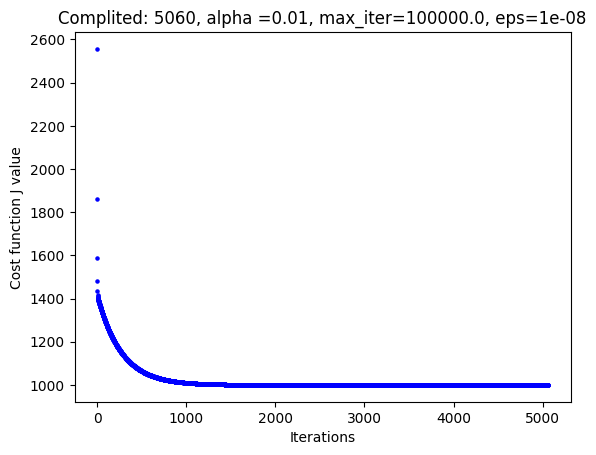

In [306]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
import time
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
print ('X_train= \n{}'.format (X_train[:5,:]))

start_time_not_scaled = time.time()
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit(X_train, y_train)
lin_reg.draw_cost_changes()
end_time_not_scaled = time.time() - start_time_not_scaled

print ('R2 Score =', lin_reg.score(X_test, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

### <font color = red>Expected output is incorrect, because another dataset was used</font>
<font color = blue>
Expected output:
</font>

```
R2 Score = 0.5725111120596516
b: -32.426140228921874, w= [[8.70481894]]
```


<font color = green >

### Draw scatter and prediction for one feature
</font>

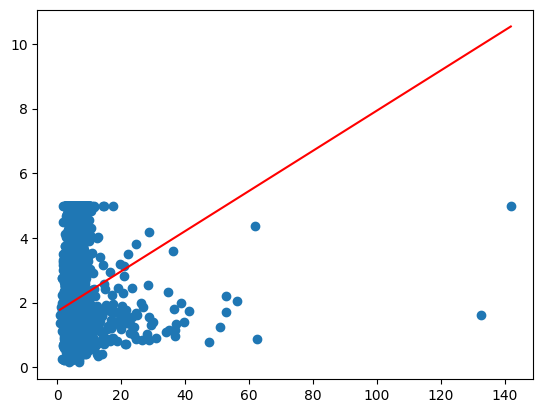

In [307]:
if X_train.shape[1]>1:
    raise Exception ('Select single feature to plot')
plt.figure()
plt.scatter(X_train, y_train)
x_line= np.array([np.min(X_train), np.max(X_train)])
z_line = lin_reg.predict(x_line.reshape(-1,1))
plt.plot(x_line, z_line, '-', c='red')

<font color = green >

### Using normalization
</font>

In [308]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

R2 Score = 0.029578770123950826
b: 2.0652110485876887, w= [[0.16368653]]
Runtime of non-scaled version: 2.2117691040039062 seconds
Runtime of scaled version: 0.5277876853942871 seconds


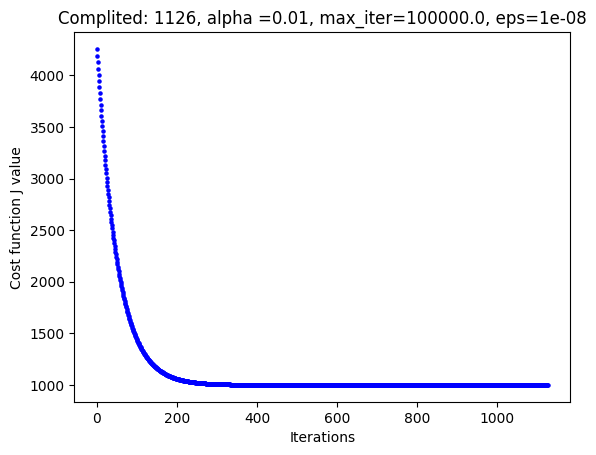

In [309]:
start_time_scaled = time.time()
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train_scaled, y_train)
end_time_scaled = time.time() - start_time_scaled
print('R2 Score =',lin_reg.score(X_test_scaled, y_test))
lin_reg.draw_cost_changes()
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_))
print(f"Runtime of non-scaled version: {end_time_not_scaled} seconds")
print(f"Runtime of scaled version: {end_time_scaled} seconds")

#### Note: How faster it converges 

<font color = green >

## Run Linear Regression for multi features 
    
</font>

In [310]:
np.random.seed(2021)
X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state=2018)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:5]

X_train.shape=  (15480, 8)
y_train.shape=  (15480,)


array([[ 2.37500000e+00,  1.10000000e+01,  4.94210526e+00,
         9.84210526e-01,  5.57000000e+02,  2.93157895e+00,
         3.36700000e+01, -1.17070000e+02],
       [ 3.09380000e+00,  3.10000000e+01,  3.66765579e+00,
         9.76261128e-01,  1.48600000e+03,  4.40949555e+00,
         3.39800000e+01, -1.18170000e+02],
       [ 3.56730000e+00,  1.10000000e+01,  5.93258427e+00,
         1.13483146e+00,  1.25700000e+03,  2.82471910e+00,
         3.92900000e+01, -1.21320000e+02],
       [ 5.43490000e+00,  3.30000000e+01,  6.29444444e+00,
         1.01388889e+00,  9.52000000e+02,  2.64444444e+00,
         3.29800000e+01, -1.15550000e+02],
       [ 7.91250000e+00,  1.20000000e+01,  6.84523810e+00,
         9.76190476e-01,  2.04200000e+03,  3.47278912e+00,
         3.37000000e+01, -1.17760000e+02]])

[-0.78999749 -1.40590003 -0.19109026 -0.22756638 -0.76580512 -0.01483143
 -0.92003742  1.24954781]
R2 training Score = 0.6046913726261832
R2 Score = 0.6105162112161242
b: 2.0726193307492906, w= [[ 0.83083232  0.1178649  -0.27946548  0.32190423 -0.00576275 -0.04020031
  -0.89550104 -0.8695331 ]]


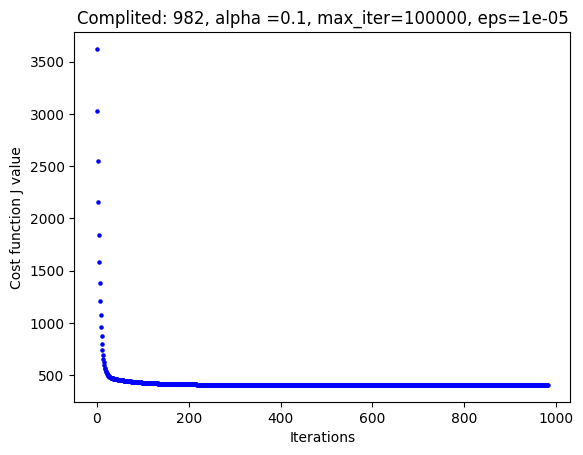

In [312]:
lin_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000)
print(X_train_scaled[0])
lin_reg.fit(X_train_scaled, y_train)
lin_reg.draw_cost_changes()
print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = blue>
Expected output:
</font>

```
R2 training Score = 0.7283111795119549
R2 Score = 0.7714399743645595
b: 22.199472295514532, w= [[-6.71888107e-01  1.10023856e+00  4.11947599e-03  8.26282274e-01
  -2.22625058e+00  2.43471682e+00  2.54149326e-01 -3.29472715e+00
   2.45132782e+00 -1.99309805e+00 -1.95019870e+00  7.67364288e-01
  -4.20581658e+00]]
```


<font color = green >

### Compare with sklearn
</font>

In [313]:
from sklearn.linear_model import LinearRegression
lin_reg_sklearn = LinearRegression().fit(X_train_scaled, y_train)
lin_reg_sklearn.score(X_test_scaled, y_test)

0.6105273580862913

<font color = green >

## Regularization
    
</font>

In [314]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state=2018)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)

scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

X_train.shape=  (331, 10)
y_train.shape=  (331,)


In [315]:
class Linear_Regression():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01, eps = 1e-10, verbose= 0, mode = ""):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.mode = mode
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= np.dot(X,w.T) + b
        # END_CODE 

        # a little fix, the multifeatures fit won't work, coz (X.shape[0], ----> 1 <---- ) is hard-coded
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y, w):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        J_res = 1/(2*m) * np.sum((h - y)**2)
        if self.mode == 'ridge':
            J_res += self.alpha/(2*m) * np.sum(w ** 2)
        elif self.mode == 'lasso':
            J_res += self.alpha/(2*m) * np.sum(np.abs(w))
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        dH = h_val - y # also it is called like dZ in Andrew NG's courses
        dJ_b= (1 / self.m) * np.sum(dH)
        dJ_w= (1 / self.m) * np.dot(dH.T, X)
        if self.mode == 'ridge':
            dJ_w += self.alpha / self.m * w
        elif self.mode == 'lasso':
            dJ_w += self.alpha / self.m * np.sign(w)
        
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n = X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Develop one step of gradien descent 
            # START_CODE 
            dJ_b, dJ_w =  self.J_derivative(params, X, y)
            b= b - self.alpha * dJ_b
            w= w - self.alpha * dJ_w
            params = (b,w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b,w,X), y, w))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
        
    def draw_cost_changes(self):        
        J_hist= self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)

        return (r2_score(y_test, z))


In [316]:
print(X_train_scaled[0])

[-0.78508072  0.9969834  -1.15183204 -0.39452697 -0.1705023  -0.1373159
  0.83281793 -0.8127217  -1.08328283  0.54750506]


<font color = green >

## Load_diabetes No Regularization
    
</font>

R2 training Score = 0.5391453831435329
R2 Score = 0.42519760177908883
b: 149.6193353474319, w= [[  0.19638575 -10.35233917  25.35987492  13.62629741 -35.4482412
   20.79468778   8.2764373   11.15726914  37.10795853   2.97885677]]


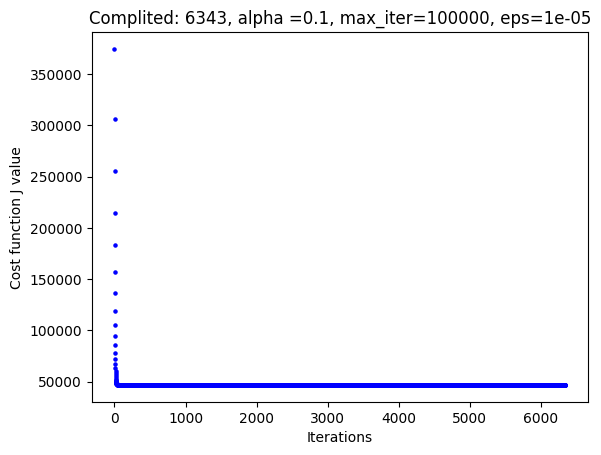

In [317]:
linear_regression_start = time.time()
lin_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000, mode='')
lin_reg.fit(X_train_scaled, y_train)
lin_reg.draw_cost_changes()
linear_regression_runtime = time.time() - linear_regression_start

print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = green >

## Load_diabetes with Regularization Ridge
    
</font>

R2 training Score = 0.5391403419606573
R2 Score = 0.4252347798674828
b: 149.6193353474319, w= [[  0.20191961 -10.34622879  25.37512485  13.60999256 -34.24942228
   19.89176742   7.69566172  10.95177944  36.63201513   2.97781246]]


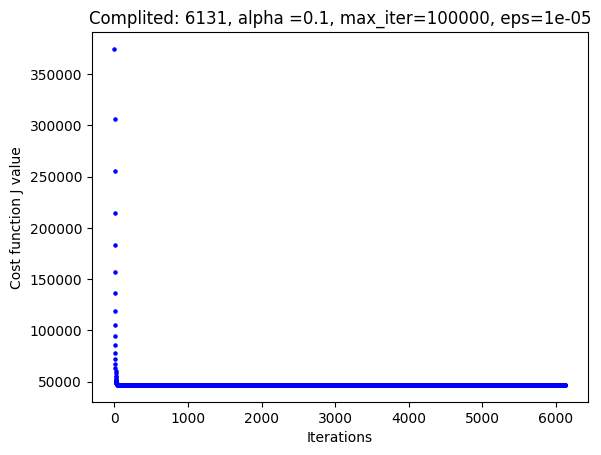

In [318]:
lin_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000, mode='ridge')
lin_reg.fit(X_train_scaled, y_train)
lin_reg.draw_cost_changes()
print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = green >

## Load_diabetes with Regularization Lasso
    
</font>

R2 training Score = 0.5391453494898155
R2 Score = 0.42520009808689163
b: 149.6193353474319, w= [[  0.19619402 -10.35183693  25.3602739   13.62561111 -35.41101201
   20.76776888   8.25706522  11.14860052  37.09412744   2.9785142 ]]


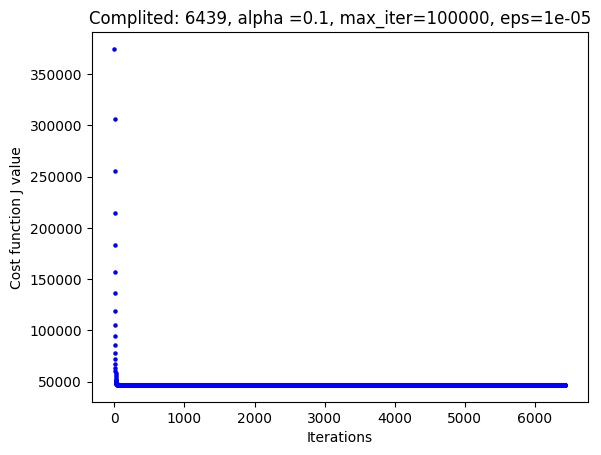

In [319]:
lin_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000, mode='lasso')
lin_reg.fit(X_train_scaled, y_train)
lin_reg.draw_cost_changes()
print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = green >

## Polynomial Feautures
    
</font>

R2 training Score = 0.5391453494898155
R2 Score = 0.42520009808689163
b: 149.6193353474319, w= [[  0.19619402 -10.35183693  25.3602739   13.62561111 -35.41101201
   20.76776888   8.25706522  11.14860052  37.09412744   2.9785142 ]]
Runtime of Linear Regression: 0.3869943618774414 seconds
Runtime of Polynomial Regression: 37.28497242927551 seconds


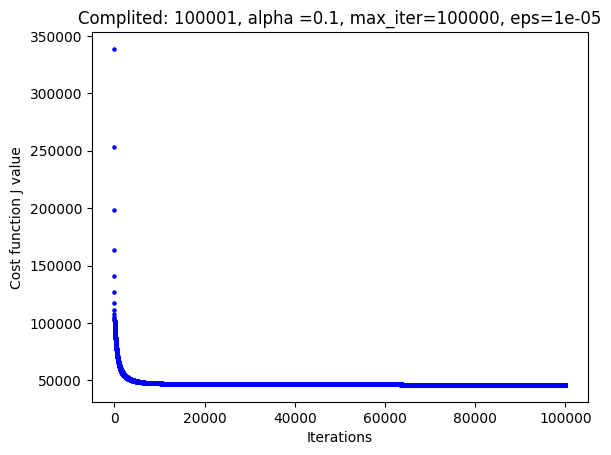

In [320]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression_start = time.time()
pol_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000, mode='lasso')
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
pol_reg.fit(X_poly, y_train)
pol_reg.draw_cost_changes()
polynomial_regression_runtime = time.time() - polynomial_regression_start

print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 
print(f'Runtime of Linear Regression: {linear_regression_runtime} seconds')
print(f'Runtime of Polynomial Regression: {polynomial_regression_runtime} seconds')

<font color = green >

## Normal equatation
    
</font>

In [339]:
class Linear_Regression_Normal_Equatation():
    '''
    linear regression using gradient descent
    '''
    def __init__(self):
        pass
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        print(X.shape, w.shape)
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= np.dot(X,w.T) + b
        # END_CODE 
        # a little fix, the multifeatures fit won't work, coz (X.shape[0], ----> 1 <---- ) is hard-coded
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res
        
    def fit(self, X, y):
        '''
        Fit the model using the normal equation
        :param X: ndarray of shape (m, n)
        :param y: ndarray of shape (m,1)
        :return: optimal parameters b and w
        '''
        # Add a column of ones to X for the bias term
        X_b = np.hstack((np.ones((X.shape[0], 1)), X))

        # Compute the optimal parameters using the normal equation
        params = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Separate the bias and weights
        b = params[0]
        w = params[1:].reshape(1,-1)
        self.intercept_, self.coef_ = b, w

        return True
        
    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)

        return (r2_score(y_test, z))


In [344]:
start_time_normal = time.time()
lin_reg_normal = Linear_Regression_Normal_Equatation()
lin_reg_normal.fit(X_train_scaled, y_train)
lin_reg_normal_runtime = time.time() - start_time_normal
print('R2 Score =',lin_reg_normal.score(X_test_scaled, y_test))

print ('b: {}, w= {}'.format(lin_reg_normal.intercept_, lin_reg_normal.coef_))
print(f"Runtime of linear regression normal equatation: {lin_reg_normal_runtime} seconds")
print(f"Runtime of linear regression iteration: {linear_regression_runtime} seconds")

(111, 10) (1, 10)
R2 Score = 0.42519172124736104
b: 149.619335347432, w= [[  0.1959209  -10.352658    25.35733709  13.62801675 -35.58901472
   20.90084997   8.34500252  11.18207427  37.16287213   2.97936626]]
Runtime of linear regression normal equatation: 0.0010018348693847656 seconds
Runtime of linear regression iteration: 0.3869943618774414 seconds


In [348]:
to_predict = X_test_scaled[0,:]
y = y_test[0]
to_predict = to_predict.reshape(1,-1)
print(to_predict, "=", y)

prediction_1 = lin_reg_normal.predict(to_predict)[0] # linear regression with normal equatation
prediction_2 = lin_reg.predict(to_predict)[0] # default linear regression

print(f'Actual y is: {y}')
print(f'Prediction of linear regression(normal equatation) is: {prediction_1}')
print(f'Prediction of default linear regression is: {prediction_2}')

[[-1.01982481  0.9969834  -0.50049562  1.18952381  0.16165333  0.36309343
  -1.1690901   1.52548675  0.91635444  0.29416279]] = 163.0
(1, 10) (1, 10)
Actual y is: 163.0
Prediction of linear regression(normal equatation) is: [186.68642288]
Prediction of default linear regression is: [186.65158308]
